<a href="https://colab.research.google.com/github/Plumz17/PCD_Assignment03/blob/main/PCD_Assignment03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Third Digital Image Processing Assignment
##Analysis of Image Enhancement Methods - Anders Emmanuel Tan (24/541351/PA/22964)

## 1. Setting Up Image to be Processed

In [31]:
#Cloning Github Repository to get the Image
!rm -rf PCD_Assignment03
!git clone https://github.com/Plumz17/PCD_Assignment03

Cloning into 'PCD_Assignment03'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 17 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (17/17), 1.42 MiB | 19.13 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [32]:
# Import Important Libraries
import cv2 # For Reading Image
import numpy as np # For Manipulating Image Matrix
import matplotlib.pyplot as plt # For Showing Image
import math # For Math

filename = "/content/PCD_Assignment03/img.png"

img = cv2.imread(filename) # Read Image
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Change the color map

In [33]:
def show(before, after=None, title1="Before", title2="After"): # Helper function to check the before and after of the enhancement
  plt.figure(figsize=(10,5))

   # Show original
  plt.subplot(1,2,1)
  plt.imshow(before, cmap='gray', vmin=0, vmax=255) #vmin and max to preserve original image's contrast
  plt.title(title1)
  plt.axis("off")

  # Show processed
  plt.subplot(1,2,2)
  plt.imshow(after, cmap='gray', vmin=0, vmax=255)
  plt.title(title2)
  plt.axis("off")

  plt.show()

In [34]:
def find_otsu_threshold(image):
  hist, bins = np.histogram(image.flatten(), 256, [0, 256]) #Make the PDF of the histogram
  totalPixel = image.size
  normilizedProb = hist / totalPixel # Normalize the histogram for easier calculation
  intensityLevels = np.arange(256)
  #Define used variables to minimize WCI
  minVariance = float("inf")
  optimalTreshold = 0

  #Loop over every single Threshold from 0 to 255
  for T in range(256):
    #Calculate Weight, Mean, and Variance of background
    wb = np.sum(normilizedProb[:T + 1])
    if wb == 0:
      continue
    meanb_up = np.sum(intensityLevels[:T + 1] * normilizedProb[:T + 1])
    meanb = meanb_up / wb
    varianceb_up = np.sum(normilizedProb[:T + 1] * (intensityLevels[:T + 1] - meanb)**2)
    varianceb = varianceb_up / wb

    #Calculate Weight, Mean, and Variance of foreground
    wf = np.sum(normilizedProb[T + 1:])
    if wf == 0:
      break

    meanf_up = np.sum(intensityLevels[T + 1:] * normilizedProb[T + 1:])
    meanf = meanf_up / wf
    variancef_up = np.sum(normilizedProb[T + 1:] * (intensityLevels[T + 1:] - meanf)**2)
    variancef = variancef_up / wf

    #Use Otsu Method Formula
    within_class_variance = wb * varianceb + wf * variancef

    #Override Threshold if more otpimal
    if within_class_variance < minVariance:
      minVariance = within_class_variance
      optimalTreshold = T
  return optimalTreshold



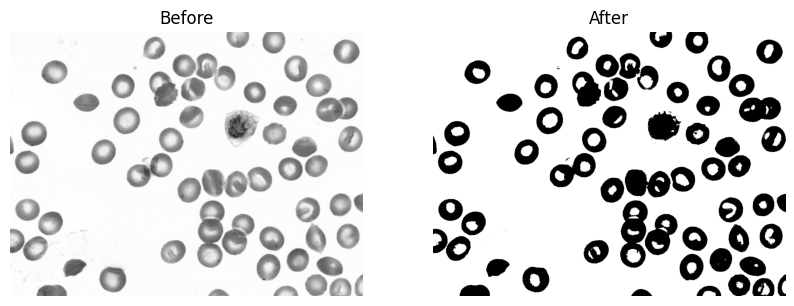

In [35]:
def segment(image, threshold = 128):
  segmented_image = np.zeros(image.shape)
  row, col = image.shape

  for r in range(row):
    for c in range(col):
      if image[r,c] > threshold:
        segmented_image[r,c] = 255

  return segmented_image

show(img, segment(img, find_otsu_threshold(img)))